In [1]:
# transistor parameters

vthp = 0.5 # V
upcox = 22.1e-6 # A/V^2
lambdap = 0.06 # 1/V
cgsp_w_l130nm = 0.89*1e-15/1e-6 # F/m
cgdp_w_l130nm = 0.13*1e-15/1e-6 # F/m
cdbp_w = 0.28*1e-15/1e-6 # F/m
csbp_w = 0.36*1e-15/1e-6 # F/m
covp_w = 300/500*1e-15/1e-6 # F/m

In [5]:
# LDO modeling
# ****************************************

import numpy as np
import matplotlib.pyplot as plt

# Opamp Macro-model
Gm = 2e-6
Rea = 14e6
Cea = 50e-15

# default values
Rldo1 = 0.5e6
Rldo2 = 0.5e6

Cldo = np.array([5e-9,20e-9,80e-9,400e-9,1200e-9,5000e-9]) # F

# Inputs
Iload = 6e-6
Vldo = 1.1
Vrect = 1.2
Vref = 0.6


Rload = Vldo / Iload
Rldo1 = Rldo2*(Vldo/Vref - 1)

vdropout = Vrect - Vldo
if vdropout>0.2:
    vdropout = 0.2

# initial values of Mp
widthp = np.array([10e-6,20e-6,50e-6,100e-6,200e-6,500e-6]) # m
lengthp = 0.25e-6 # m

vgs = 0.5 # V

gmp = np.sqrt(2*upcox*(widthp/lengthp)*Iload)
rop = 1/(lambdap*Iload)

cgsp = cgsp_w_l130nm*widthp
cgdp = cgdp_w_l130nm*widthp
cdbp = cdbp_w*widthp
csbp = csbp_w*widthp
covp = covp_w*widthp

Cvg = cgsp + cgdp

beta = Rldo2/(Rldo1+Rldo2)

Loopgain = gmp * Rload * beta * Gm * Rea

Vrect_min = Vldo + np.sqrt((2*Iload)/(upcox*(widthp/lengthp)))

# Poles - Time Constants
tc1 = Rload * Cldo
tc2 = Rea * (Cea + Cvg)

pi_value = 3.14159

p1 = 1/(2*pi_value*tc1)
p2 = 1/(2*pi_value*tc2)

print('Loopgain: ' + str(Loopgain))
print('rop: ' + str(rop))
print('Rload: ' + str(Rload))
print('Vrect_min: ' + str(Vrect_min))
print('TC1: ' + str(tc1))
print('TC2: ' + str(tc2))
print('Rldo1: ' + str(Rldo1))
print('Rldo2: ' + str(Rldo2))


# Gain-BW product
gbw=[[],[],[],[],[],[]]
for i in range(0,6):
    gbw[i] = Loopgain*p1[i]



Loopgain: [ 288.38640745  407.83996862  644.85161084  911.95789376 1289.70322168
 2039.19984308]
rop: 2777777.777777778
Rload: 183333.33333333334
Vrect_min: [1.21651035 1.18238526 1.15210501 1.13684381 1.12605251 1.11647705]
TC1: [0.00091667 0.00366667 0.01466667 0.07333333 0.22       0.91666667]
TC2: [8.428e-07 9.856e-07 1.414e-06 2.128e-06 3.556e-06 7.840e-06]
Rldo1: 416666.66666666674
Rldo2: 500000.0


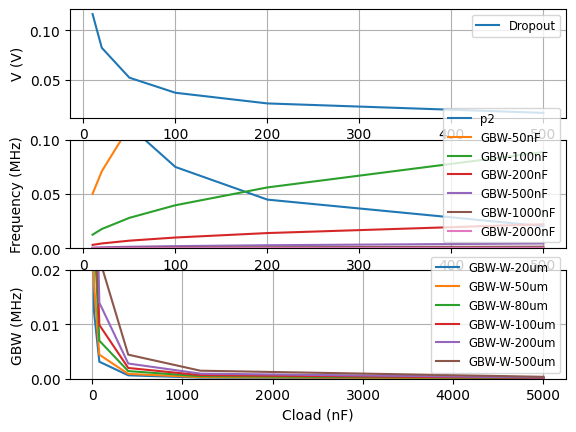

In [6]:
# ID vs VDS
fig, axs = plt.subplots(3,1)

#axs[0].set_title('sg13_lv_nmos (L=0.5um, VGS=0.75V)')
axs[0].plot(widthp*1e6, Vrect_min-Vldo, label='Dropout')
#axs[0].plot(widthp*1e6, np.array(vdrop_total_max)*[1,1,1,1,1,1], label='vdrop_total_max')
axs[0].set_ylabel('V (V)')
axs[0].set_xlabel('Wp (um)')
#axs[0].set_ylim(0,0.11)
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')

axs[1].plot(widthp*1e6, p2/1e6, label='p2')
axs[1].plot(widthp*1e6, gbw[0]/1e6, label='GBW-50nF')
axs[1].plot(widthp*1e6, gbw[1]/1e6, label='GBW-100nF')
axs[1].plot(widthp*1e6, gbw[2]/1e6, label='GBW-200nF')
axs[1].plot(widthp*1e6, gbw[3]/1e6, label='GBW-500nF')
axs[1].plot(widthp*1e6, gbw[4]/1e6, label='GBW-1000nF')
axs[1].plot(widthp*1e6, gbw[5]/1e6, label='GBW-2000nF')
axs[1].set_ylabel('Frequency (MHz)')
axs[1].set_xlabel('Wp (um)')
axs[1].set_ylim(0,0.1)
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

axs[2].plot(Cldo*1e9, p1*Loopgain[0]/1e6, label='GBW-W-20um')
axs[2].plot(Cldo*1e9, p1*Loopgain[1]/1e6, label='GBW-W-50um')
axs[2].plot(Cldo*1e9, p1*Loopgain[2]/1e6, label='GBW-W-80um')
axs[2].plot(Cldo*1e9, p1*Loopgain[3]/1e6, label='GBW-W-100um')
axs[2].plot(Cldo*1e9, p1*Loopgain[4]/1e6, label='GBW-W-200um')
axs[2].plot(Cldo*1e9, p1*Loopgain[5]/1e6, label='GBW-W-500um')
axs[2].set_ylabel('GBW (MHz)')
axs[2].set_ylim(0,0.02)
axs[2].grid()
axs[2].legend(loc='best',fontsize='small')
axs[2].set_xlabel('Cload (nF)')


plt.show()

In [7]:
# output W and L
widthp_val = np.interp(vdropout,np.flip(Vrect_min-Vldo),np.flip(widthp))

print('widthp_val = ' + str(widthp_val))
print('lengthp_val = ' + str(lengthp))

# Output Cldo
p2_val = np.interp(widthp_val,widthp,p2)
gbw_wp = p1*np.interp(widthp_val,widthp,Loopgain)
print('p2_val = ' + str(p2_val))
Cldo_val = np.interp(p2_val/10,np.flip(gbw_wp),np.flip(Cldo))
print('Cldo_val = ' + str(Cldo_val))

widthp_val = 1.4838183733597251e-05
lengthp_val = 2.5e-07
p2_val = 175603.3648724076
Cldo_val = 1.9156789912500345e-08
